In [51]:
%autoreload 2
from plasmapy import simulation
import astropy.units as u
import numpy as np

In [52]:
import xarray

In [53]:
from plasmapy.classes.sources.interparticle import InterParticleForces

In [78]:
eq_distance = 0.1
forces = {key: InterParticleForces(key, 100, eq_distance, 1, 1e4, 0.01, 7) for key in ('python', 'njit', 'njit_parallel')}

from collections import namedtuple
CustomParticle = namedtuple('custom_particle', ['mass', 'charge'])
particle = CustomParticle(mass=1 * u.dimensionless_unscaled, charge=1 * u.dimensionless_unscaled)

L = 1 * u.m
N = 1
x = u.Quantity([[0.5, 0.5, 0.5]],  u.m)
v = u.Quantity(np.random.normal(scale=100, size=(1,3)), u.m / u.s)

In [84]:
solutions = {engine: simulation.ParticleTracker(forces[engine], x, v, particle).run(2e-2 * u.s, dt = 1e-6 * u.s, snapshot_steps = 10000) for engine in ['njit']}
solution = solutions['njit']

In [85]:
solutions['njit']

<xarray.Dataset>
Dimensions:           (dimension: 3, particle: 1, time: 10001)
Coordinates:
  * time              (time) float64 0.0 3e-06 5e-06 7e-06 ... 0.02 0.02 0.02
  * particle          (particle) int64 0
  * dimension         (dimension) <U1 'x' 'y' 'z'
Data variables:
    position          (time, particle, dimension) float64 0.5 0.5 ... 0.9807
    velocity          (time, particle, dimension) float64 182.7 112.4 ... -27.75
    B                 (time, particle, dimension) float64 0.0 0.0 ... 0.0 0.0
    E                 (time, particle, dimension) float64 0.0 0.0 ... 0.0 0.0
    timestep          (time) float64 1e-06 1e-06 1e-06 ... 1e-06 1e-06 1e-06
    kinetic_energy    (time, particle) float64 2.34e+04 2.34e+04 ... 2.34e+04
    potential_energy  (time, particle) float64 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0
Attributes:
    particle:          custom_particle(mass=<Quantity 1.>, charge=<Quantity 1.>)
    total_iterations:  20001

In [ ]:
solutions['njit'].position.sel(dimension='x', particle=0).plot.line()
import matplotlib.pyplot as plt
plt.axhline(0)

In [ ]:
solutions['njit'].velocity.sel(dimension='x', particle=0).plot.line()
import matplotlib.pyplot as plt
plt.axvline(1e-4)

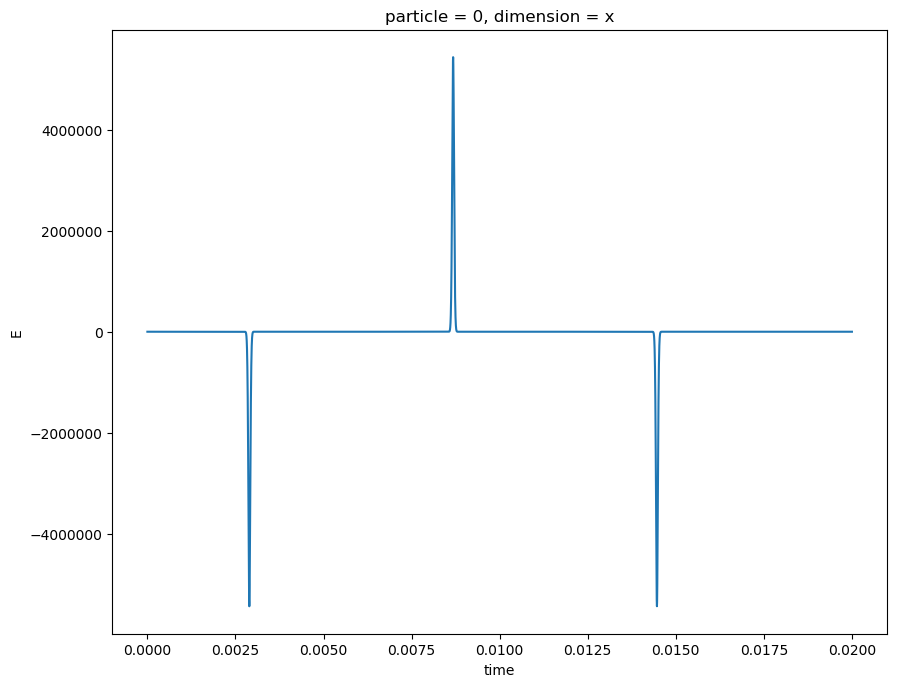

In [88]:
solutions['njit'].E.sel(dimension='x', particle=0).plot.line()

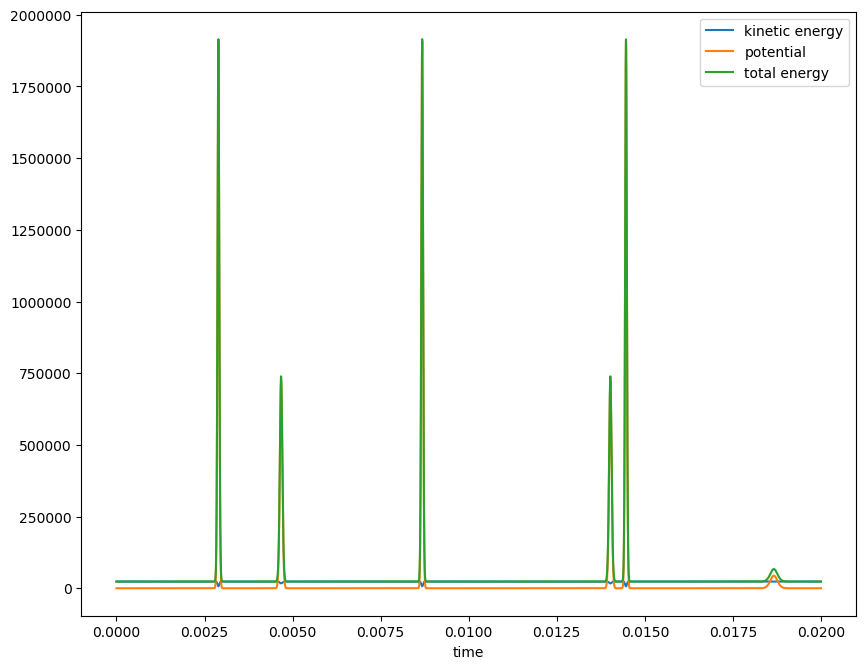

In [89]:
solutions['njit'].kinetic_energy.sum(dim='particle').plot.line(label="kinetic energy")
solutions['njit'].potential_energy.sum(dim='particle').plot.line(label="potential")
(solutions['njit'].potential_energy + solutions['njit'].kinetic_energy).sum(dim='particle').plot.line(label="total energy")
plt.legend()
plt.savefig("energia.png")

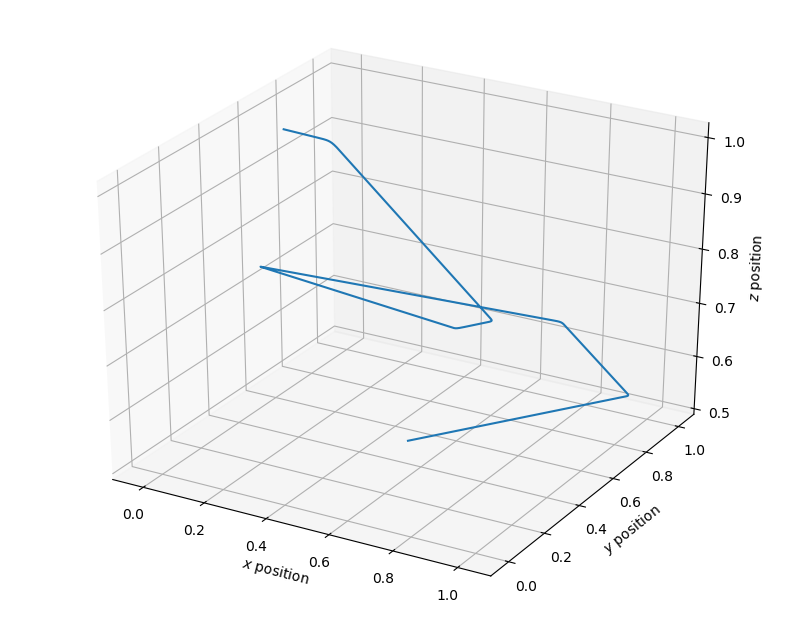

In [90]:
solution.particletracker.plot_trajectories()

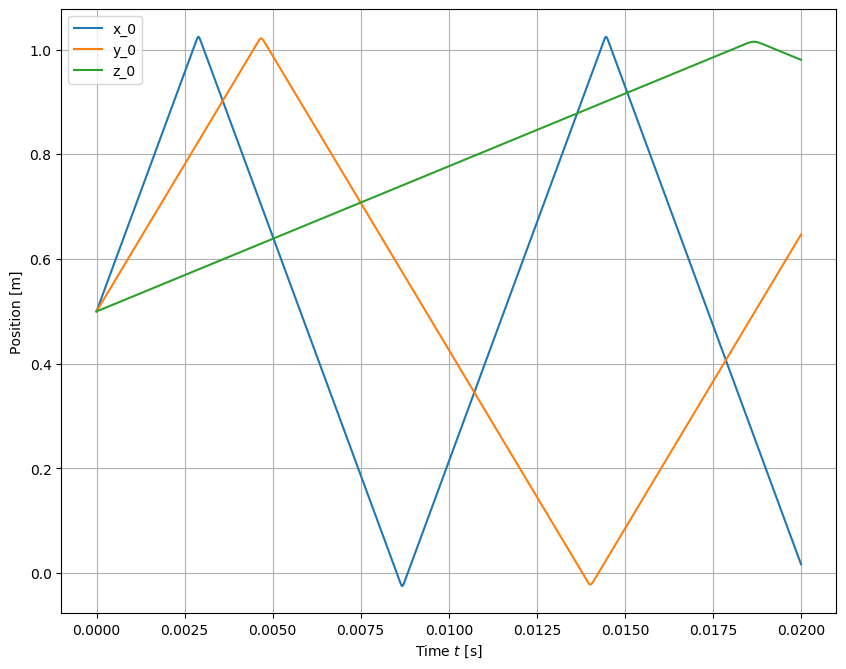

In [91]:
solution.particletracker.plot_time_trajectories('xyz')

In [34]:
solution.particle

<xarray.DataArray 'particle' (particle: 1)>
array([0])
Coordinates:
  * particle  (particle) int64 0

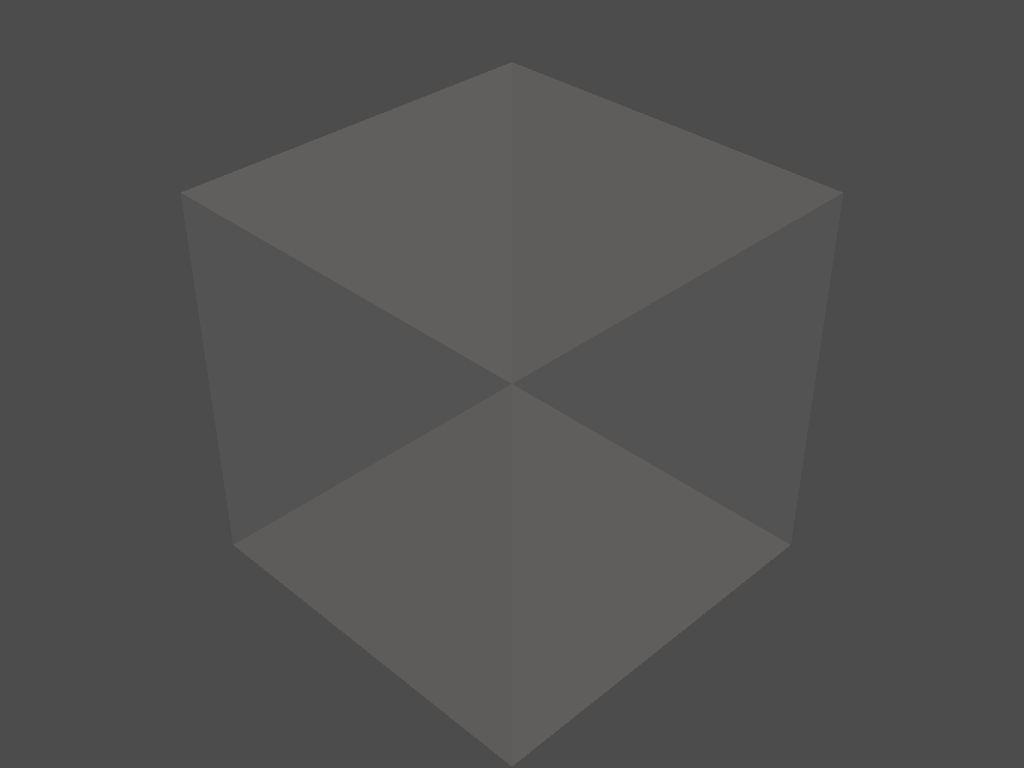

In [92]:
solution.particletracker.animate("/mnt/hdd/wall.mp4", solution.particle, nframes=50, notebook_display = True, plasma = forces['njit'])